In [1]:
!pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [2]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

/tmp/ipykernel_232/1469656925.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


2 h2o close knee value: 0.4646, corresponding P: 3.31078769 km
3 h2o close knee value: 0.5487, corresponding P: 4.105206882 km
4 h2o close knee value: 0.6539, corresponding P: 4.889528356 km
5 h2o close knee value: 0.7248, corresponding P: 6.050809826 km
6 h2o close knee value: 0.8793, corresponding P: 6.816344948 km
7 h2o close knee value: 0.806, corresponding P: 9.088722831 km
8 h2o close knee value: 0.9239, corresponding P: 9.840811396 km


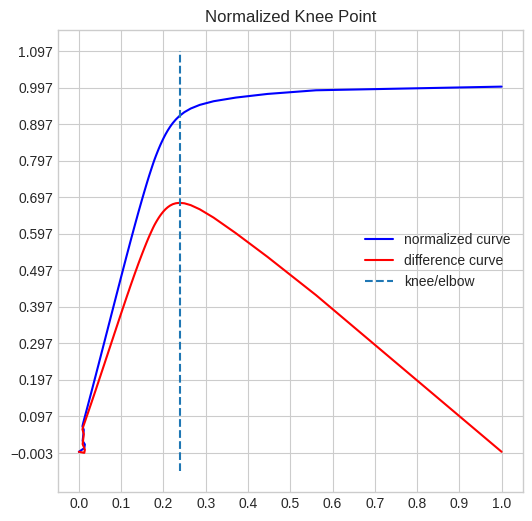

<Figure size 600x600 with 0 Axes>

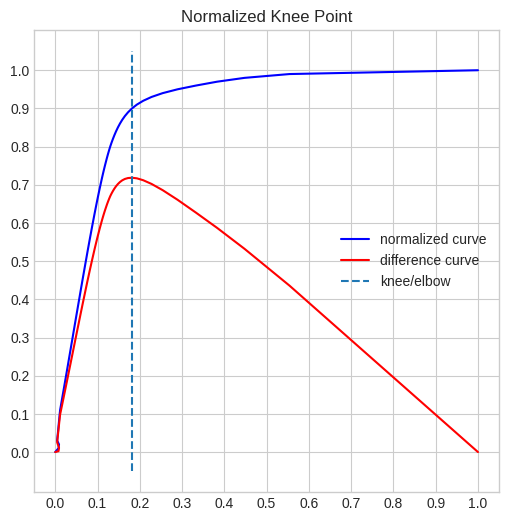

<Figure size 600x600 with 0 Axes>

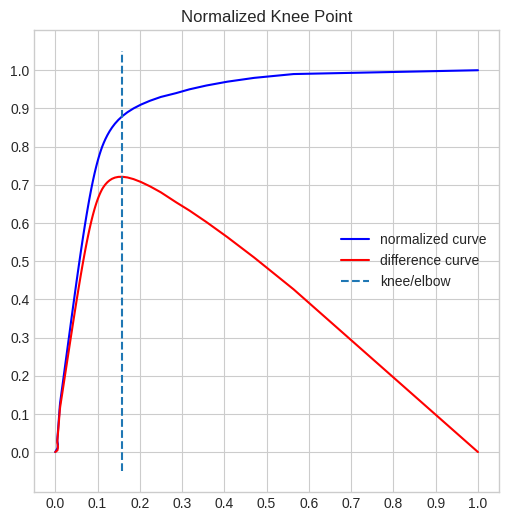

<Figure size 600x600 with 0 Axes>

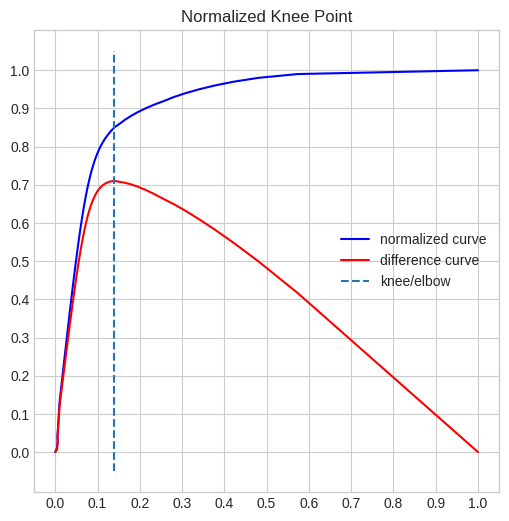

<Figure size 600x600 with 0 Axes>

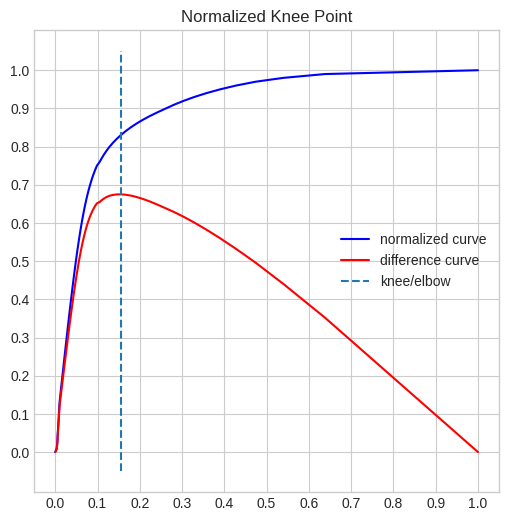

<Figure size 600x600 with 0 Axes>

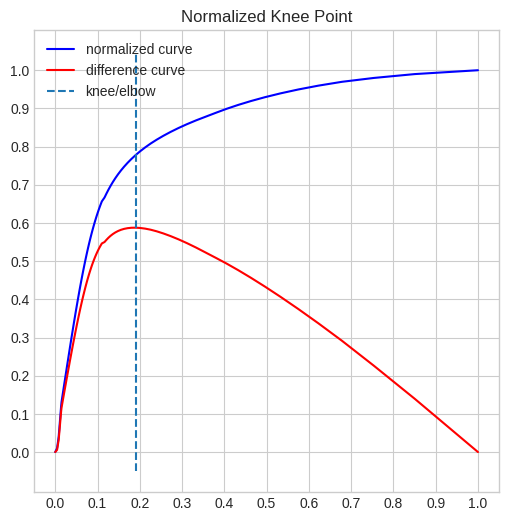

<Figure size 600x600 with 0 Axes>

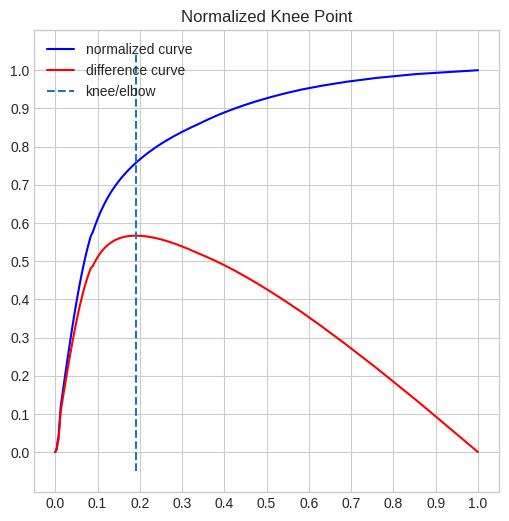

<Figure size 600x600 with 0 Axes>

In [3]:
datasets = ["2 h2o close", "3 h2o close", "4 h2o close", "5 h2o close", "6 h2o close", "7 h2o close", "8 h2o close"]

for dataset in datasets:
    magic_data = pd.read_csv(f"{dataset}.csv")
    
    magic = KneeLocator(
        magic_data['delta log viscosity (poise)'].values,
        magic_data['P (kbars)'].values,
        S=10,
        curve='convex',
        direction='decreasing',
        online=True
    )
    
    knee_value = magic.knee
    
    P_array = magic_data['P (kbars)'].values
    delta_log_viscosity_array = magic_data['delta log viscosity (poise)'].values
    depth_array = magic_data['Depth (km)'].values

    closest_index = (np.abs(delta_log_viscosity_array - knee_value)).argmin()
    depth_value = depth_array[closest_index]
    
    print(f"{dataset} knee value: {knee_value}, corresponding P: {depth_value} km")
    magic.plot_knee_normalized()
    
    magic.plot_knee()
    
    plt.savefig(f"{dataset}_knee_plot.svg", format='svg')
    
    plt.clf()